In [ ]:
import pandas as pd

# 파일 경로 설정
input_path = '/content/CEACAM6_filtered_contig_igblast_db-pass.csv'
output_path = '/content/CEACAM6_filtered_contig_igblast_db-pass_2.csv'

# CSV 읽기
df = pd.read_csv(input_path, dtype=str)

# 첫 번째 열(header 제외)의 값에서 언더스코어(_) 앞 숫자만 추출
df.iloc[:, 0] = df.iloc[:, 0].str.split('_').str[0]

# 결과 저장
df.to_csv(output_path, index=False)

print(f'완료: {output_path}')


완료: /content/CEACAM6_filtered_contig_igblast_db-pass_2.csv


In [ ]:
import pandas as pd

# CSV 파일 읽기
df = pd.read_csv('/content/CEACAM6_filtered_contig_igblast_db-pass_2.csv')

# 처음 5줄 출력 (필요에 따라 줄 수 변경 가능)
print(df.head())

   sequence_id                                           sequence  rev_comp  \
0         9738  GACATTGTGATGACCCAGTCTCAAAAATTCATGTCCACATCAGTAG...     False   
1         9738  CAAGTTACTCTAAAAGAGTCTGGCCCTGGGATATTGAAGCCCTCAC...     False   
2         6319  GACATTGTGATGACCCAGTCTCAAAAATTCATGTCCACATCAGTAG...     False   
3        11251  GACATTGTGATGACACAGTCTCCATCCTCCCTGACTGTGACAGCAG...     False   
4        11251  GATGTTTTGATGACCCAAACTCCACTCTCCCTGCCTGTCAGTCTTG...     False   

   productive        v_call      d_call    j_call  \
0        True   IGKV6-15*01         NaN  IGKJ5*01   
1        True    IGHV8-8*01  IGHD5-5*01  IGHJ2*01   
2        True   IGKV6-15*01         NaN  IGKJ1*01   
3        True   IGKV8-19*01         NaN  IGKJ2*01   
4        True  IGKV1-117*01         NaN  IGKJ2*01   

                                  sequence_alignment  \
0  GACATTGTGATGACCCAGTCTCAAAAATTCATGTCCACATCAGTAG...   
1  CAAGTTACTCTAAAAGAGTCTGGCCCT...GGGATATTGAAGCCCT...   
2  GACATTGTGATGACCCAGTCTCAAAAATTCATGTC

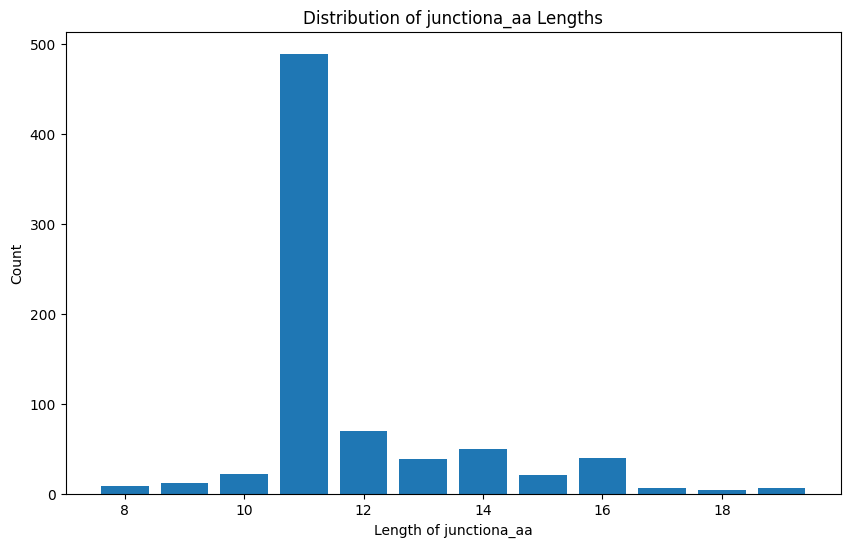

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV 파일 읽기 (파일 경로에 맞게 수정)
df = pd.read_csv("/content/CEACAM6_filtered_contig_igblast_db-pass_2.csv")

# 'junctiona_aa' 열의 값들이 문자열이 아닐 경우 문자열로 변환한 후 길이 계산
df['junctiona_aa_length'] = df['junction_aa'].astype(str).apply(len)

# 각 길이별 빈도수 계산 및 정렬
length_counts = df['junctiona_aa_length'].value_counts().sort_index()

# Bar plot 그리기
plt.figure(figsize=(10, 6))
plt.bar(length_counts.index, length_counts.values)
plt.xlabel("Length of junctiona_aa")
plt.ylabel("Count")
plt.title("Distribution of junctiona_aa Lengths")
plt.show()


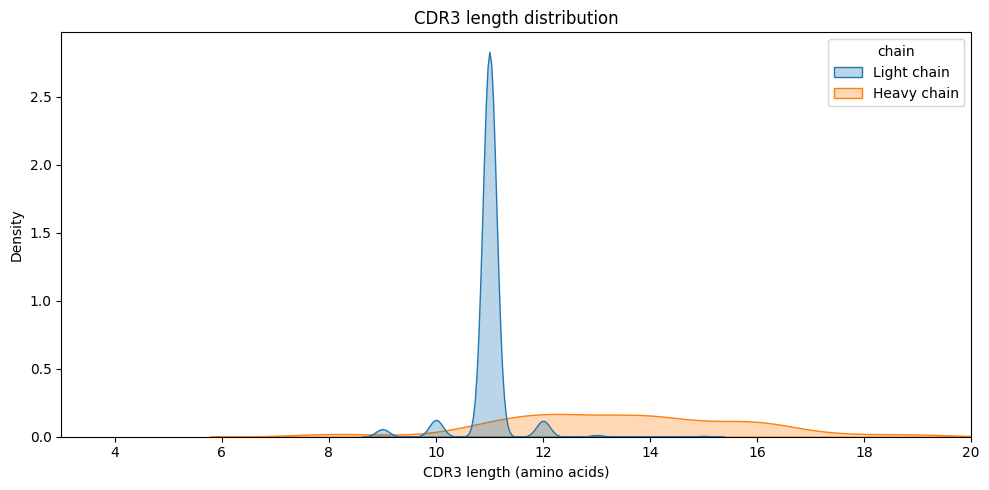

In [ ]:
# 필요한 라이브러리 설치
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# CSV 파일 읽기
df = pd.read_csv('/content/CEACAM6_filtered_contig_igblast_db-pass_2.csv')

# CDR3 길이를 아미노산 단위로 변환 (소수점 아래는 버림)
df['cdr3_aa_length'] = df['junction_aa'].str.len() // 1

# Light chain vs Heavy chain 구분
def classify_chain(locus):
    if locus in ['IGK', 'IGL']:
        return 'Light chain'
    elif locus == 'IGH':
        return 'Heavy chain'
    else:
        return None  # 무시할 수 있음

df['chain'] = df['locus'].apply(classify_chain)
df = df[df['chain'].notnull()]  # 기타 제거

# 그래프 그리기
plt.figure(figsize=(10, 5))
sns.kdeplot(data=df, x='cdr3_aa_length', hue='chain',
            fill=True, common_norm=False, alpha=0.3, linewidth=1)

plt.title('CDR3 length distribution')
plt.xlabel('CDR3 length (amino acids)')
plt.ylabel('Density')
plt.xlim(3, 20)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# CSV 파일 불러오기
df = pd.read_csv('/content/CEACAM6_filtered_contig_igblast_db-pass_2.csv')

# CDR3 길이 DNA 기준 -> 아미노산 길이로 변환
df['cdr3_aa_length'] = df['junction_aa'].str.len() // 1

# Heavy vs Light 분류
def classify_chain(locus):
    if locus in ['IGK', 'IGL']:
        return 'Light chain'
    elif locus == 'IGH':
        return 'Heavy chain'
    else:
        return None

df['chain'] = df['locus'].apply(classify_chain)
df = df[df['chain'].notnull()]


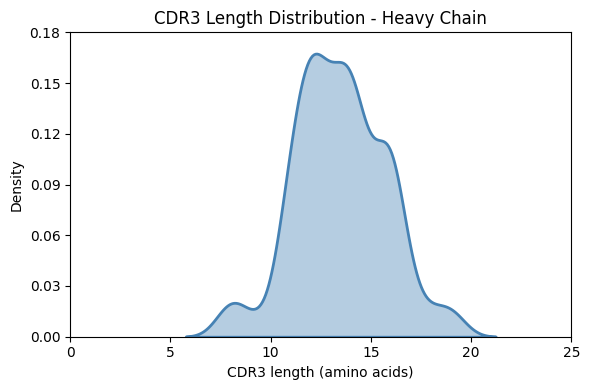

In [ ]:
# Heavy chain만 필터링
heavy_df = df[df['chain'] == 'Heavy chain']

plt.figure(figsize=(6, 4))
sns.kdeplot(data=heavy_df, x='cdr3_aa_length', fill=True, alpha=0.4, linewidth=2, color='steelblue')

# y축 설정: 0~0.18, 간격 0.03
plt.ylim(0, 0.18)
plt.yticks([i/100 for i in range(0, 19, 3)])  # 0.00, 0.03, ..., 0.18

plt.title('CDR3 Length Distribution - Heavy Chain')
plt.xlabel('CDR3 length (amino acids)')
plt.ylabel('Density')
plt.xlim(0, 25)
plt.tight_layout()
plt.show()


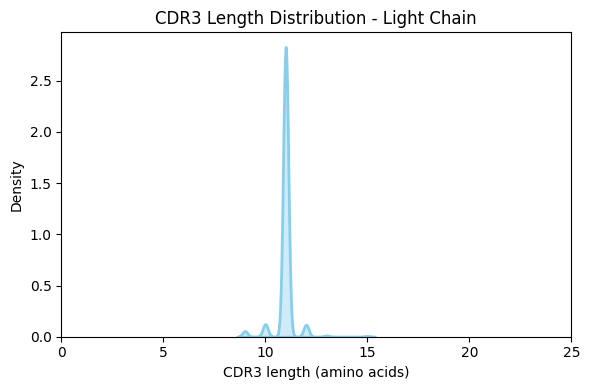

In [ ]:
# Light chain만 필터링
light_df = df[df['chain'] == 'Light chain']

plt.figure(figsize=(6, 4))
sns.kdeplot(data=light_df, x='cdr3_aa_length', fill=True, alpha=0.4, linewidth=2, color='skyblue')
plt.title('CDR3 Length Distribution - Light Chain')
plt.xlabel('CDR3 length (amino acids)')
plt.ylabel('Density')
plt.xlim(0, 25)
plt.tight_layout()
plt.show()


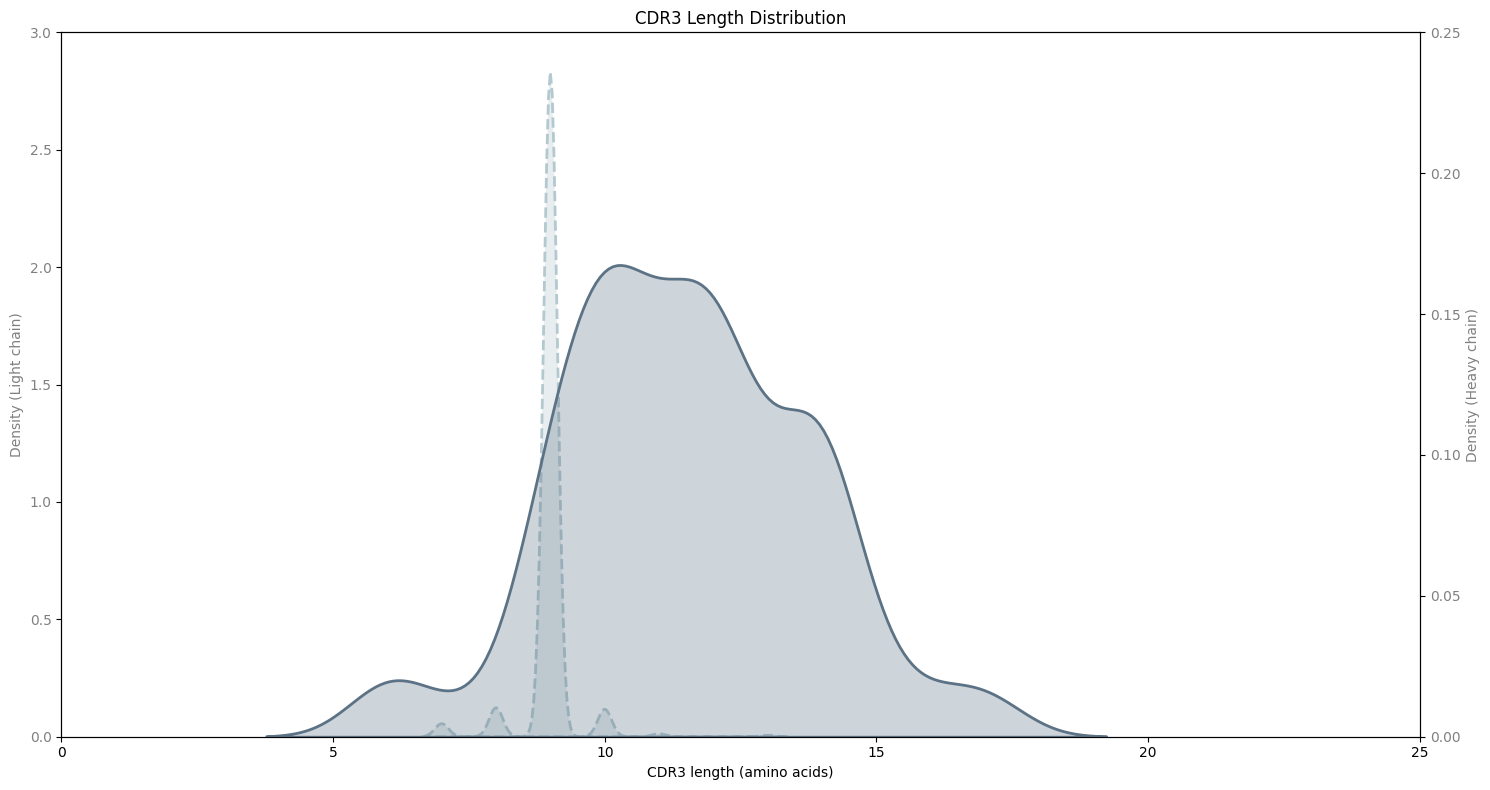

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# CSV 파일 읽기
df = pd.read_csv('/content/CEACAM6_filtered_contig_igblast_db-pass_2.csv')

# CDR3 길이 DNA → 아미노산 길이
df['cdr3_aa_length'] = df['cdr3'].str.len() // 3

# Heavy vs Light 분류
def classify_chain(locus):
    if locus in ['IGK', 'IGL']:
        return 'Light chain'
    elif locus == 'IGH':
        return 'Heavy chain'
    else:
        return None

df['chain'] = df['locus'].apply(classify_chain)
df = df[df['chain'].notnull()]

# Light chain & Heavy chain 분리
light_df = df[df['chain'] == 'Light chain']
heavy_df = df[df['chain'] == 'Heavy chain']

# Plotting with twin y-axis
fig, ax1 = plt.subplots(figsize=(15, 8))

# Light chain: 왼쪽 y축
sns.kdeplot(data=light_df, x='cdr3_aa_length', ax=ax1,
            fill=True, alpha=0.3, linewidth=2, color='#B3C8CF', label='Light chain', linestyle='--')
ax1.set_ylabel('Density (Light chain)', color='gray')
ax1.tick_params(axis='y', labelcolor='gray')
ax1.set_ylim(0, 3.0)
ax1.set_xlim(0, 25)

# Heavy chain: 오른쪽 y축
ax2 = ax1.twinx()
sns.kdeplot(data=heavy_df, x='cdr3_aa_length', ax=ax2,
            fill=True, alpha=0.3, linewidth=2, color='#5C7285', label='Heavy chain')
ax2.set_ylabel('Density (Heavy chain)', color='gray')
ax2.tick_params(axis='y', labelcolor='gray')
ax2.set_ylim(0, 0.25)

# 공통 x축
ax1.set_xlabel('CDR3 length (amino acids)')
ax1.set_title('CDR3 Length Distribution')

plt.tight_layout()
plt.show()


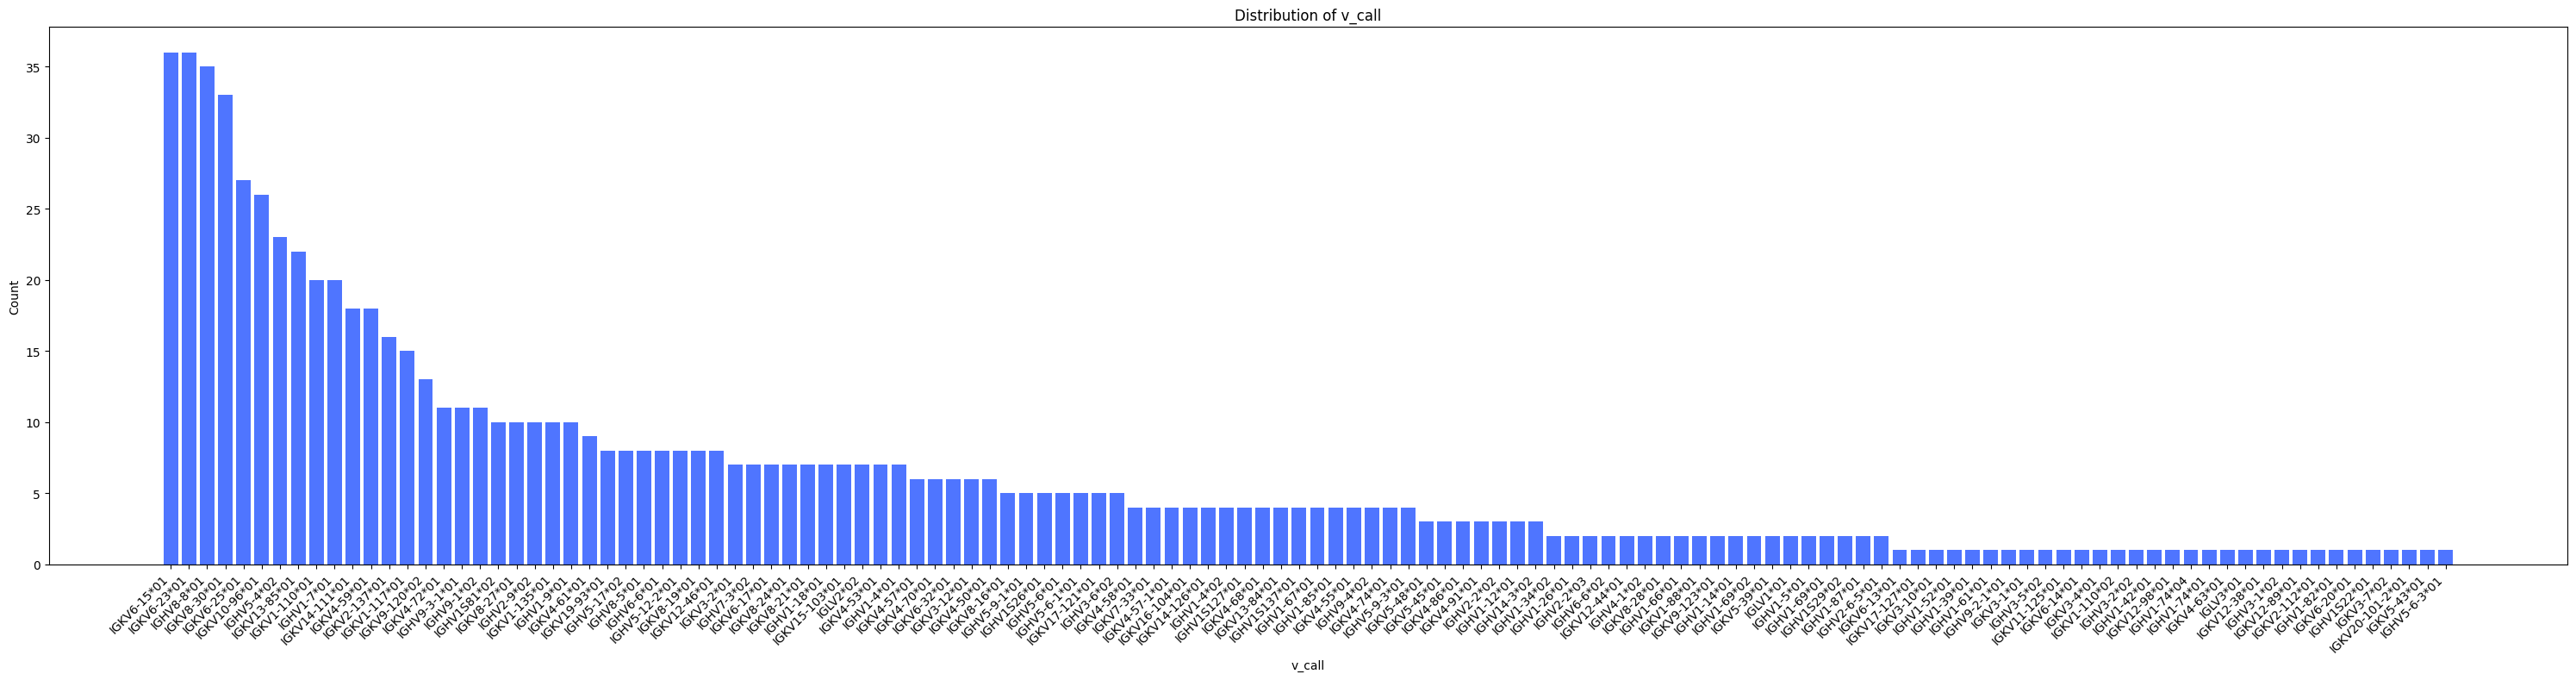

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV 파일 읽기 (파일 경로에 맞게 수정)

# v_call 열이 문자열로 되어있지 않다면 문자열로 변환
df['v_call'] = df['v_call'].astype(str)

# 쉼표로 구분된 항목들을 분리한 후, explode를 이용해 각 항목을 별도의 행으로 전개하고, 좌우 공백 제거
v_call_exploded = df['v_call'].str.split(',').explode().str.strip()

# 각 v_call 항목의 빈도수 계산
v_call_counts = v_call_exploded.value_counts()

# Bar plot 그리기
plt.figure(figsize=(30, 8))
plt.subplots_adjust(left=0.2, bottom=0.3)

plt.bar(v_call_counts.index, v_call_counts.values, color='#4F75FF')
plt.xlabel("v_call")
plt.ylabel("Count")
plt.title("Distribution of v_call")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


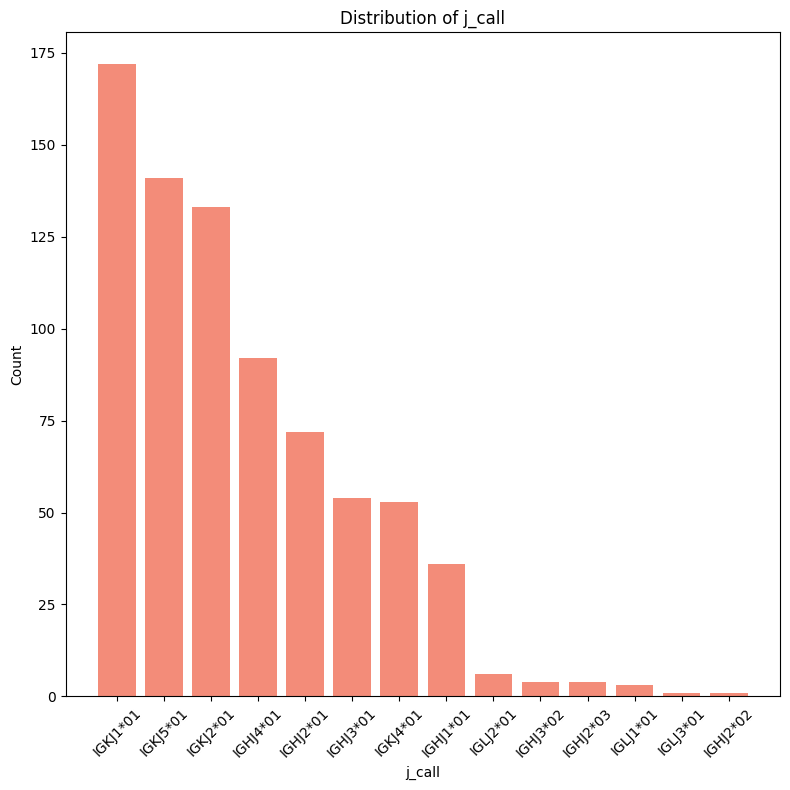

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV 파일 읽기 (파일 경로에 맞게 수정)

# v_call 열이 문자열로 되어있지 않다면 문자열로 변환
df['v_call'] = df['j_call'].astype(str)

# 쉼표로 구분된 항목들을 분리한 후, explode를 이용해 각 항목을 별도의 행으로 전개하고, 좌우 공백 제거
v_call_exploded = df['v_call'].str.split(',').explode().str.strip()

# 각 v_call 항목의 빈도수 계산
v_call_counts = v_call_exploded.value_counts()

# Bar plot 그리기
plt.figure(figsize=(8, 8))
plt.bar(v_call_counts.index, v_call_counts.values, color='#F38C79')
plt.xlabel("j_call")
plt.ylabel("Count")
plt.title("Distribution of j_call")
plt.xticks(rotation=45)  # x축 레이블 회전 (필요 시 조정)


plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# 1. 두 CSV 파일 읽기
df_igblast = pd.read_csv("/content/CEACAM6_filtered_contig_igblast_db-pass_2.csv")
df_assay = pd.read_csv("/content/CEACAM6_assay1or2or3 rere_entire_output (1).csv")


# 여기서는 "pen ID"라는 열 이름을 가정합니다.
df_igblast['base_penID'] = df_igblast['sequence_id'].astype(str).str.split('_').str[0]

# 3. assay_data 파일에서도 기준이 되는 pen ID가 "pen ID"에 있다고 가정하고, 문자열로 변환 후 "base_penID" 생성
df_assay['base_penID'] = df_assay['Pen'].astype(str)

# 4. assay_data_GC.csv에 assay1, assay2, assay3 열이 있다고 가정하고 필요한 열만 선택하여 merge 진행
df_merged = df_igblast.merge(
    df_assay[['base_penID', 'TF1', 'TF2', 'TF3']],
    on='base_penID',
    how='left'
)

# 5. 임시로 추가했던 base_penID 열을 제거 (원래 열들 오른쪽에 assay 정보만 추가됨)
df_merged = df_merged.drop(columns=['base_penID'])

# 6. 결과 저장 (원하는 파일명으로 저장)
df_merged.to_csv("/content/Ceacam6_igblast_db-pass_with_assay.csv", index=False)

print("파일이 성공적으로 수정되어 저장되었습니다.")


파일이 성공적으로 수정되어 저장되었습니다.


In [ ]:
import pandas as pd

# CSV 파일 읽기 (파일 경로를 필요에 따라 수정)
df = pd.read_csv("/content/Ceacam6_igblast_db-pass_with_assay.csv")

# "TF1" 열의 값이 "TRUE"인 데이터와 "FALSE"인 데이터를 분리합니다.
# CSV 파일 내의 값이 문자열("TRUE", "FALSE")인 경우 아래와 같이 필터링합니다.
#df_true = df[df["TF1"] == "TRUE"]
#df_false = df[df["TF1"] == "FALSE"]

# 만약 CSV 파일 내 값이 불리언(True, False)으로 저장되어 있다면 아래와 같이 사용할 수 있습니다.
df_true = df[df["TF1"] == True]
df_false = df[df["TF1"] == False]

# 분리한 데이터를 각각 CSV 파일로 저장합니다.
df_true.to_csv("/content/Ceacam6_assay1_data_TRUE.csv", index=False)
df_false.to_csv("/content/Ceacam6_assay1_data_FALSE.csv", index=False)

print("데이터 분리 및 저장 완료!")

# 만약 CSV 파일 내 값이 불리언(True, False)으로 저장되어 있다면 아래와 같이 사용할 수 있습니다.
df_true = df[df["TF2"] == True]
df_false = df[df["TF2"] == False]

# 분리한 데이터를 각각 CSV 파일로 저장합니다.
df_true.to_csv("/content/Ceacam6_assay2_data_TRUE.csv", index=False)
df_false.to_csv("/content/Ceacam6_assay2_data_FALSE.csv", index=False)

print("데이터 분리 및 저장 완료!")


데이터 분리 및 저장 완료!
데이터 분리 및 저장 완료!


In [ ]:
# 만약 CSV 파일 내 값이 불리언(True, False)으로 저장되어 있다면 아래와 같이 사용할 수 있습니다.
df_true = df[df["TF3"] == True]
df_false = df[df["TF3"] == False]

# 분리한 데이터를 각각 CSV 파일로 저장합니다.
df_true.to_csv("/content/Ceacam6_assay3_data_TRUE.csv", index=False)
df_false.to_csv("/content/Ceacam6_assay3_data_FALSE.csv", index=False)

print("데이터 분리 및 저장 완료!")

데이터 분리 및 저장 완료!


In [ ]:
import pandas as pd

# 파일 불러오기
df1 = pd.read_csv("/content/CEACAM6_filtered_contig_igblast_db-pass_2.csv")
df2 = pd.read_csv("/content/CEACAM6_assay1or2or3 rere_entire_output (1).csv")

# 문자열로 변환 후 전처리
df1['sequence_id'] = df1['sequence_id'].astype(str)
df2['Pen_clean'] = df2['Pen'].astype(str).apply(lambda x: x.split('_')[0])

# 중복 제거
df2_unique = df2[['Pen_clean', 'B1', 'B2-2', 'B3']].drop_duplicates(subset=['Pen_clean'])

# 병합
merged_df = pd.merge(df1, df2_unique, left_on='sequence_id', right_on='Pen_clean', how='left')

# 불필요한 컬럼 제거 및 저장
merged_df = merged_df.drop(columns=['Pen_clean'])
merged_df.to_csv("/content/Ceacam6_merged_output.csv", index=False)


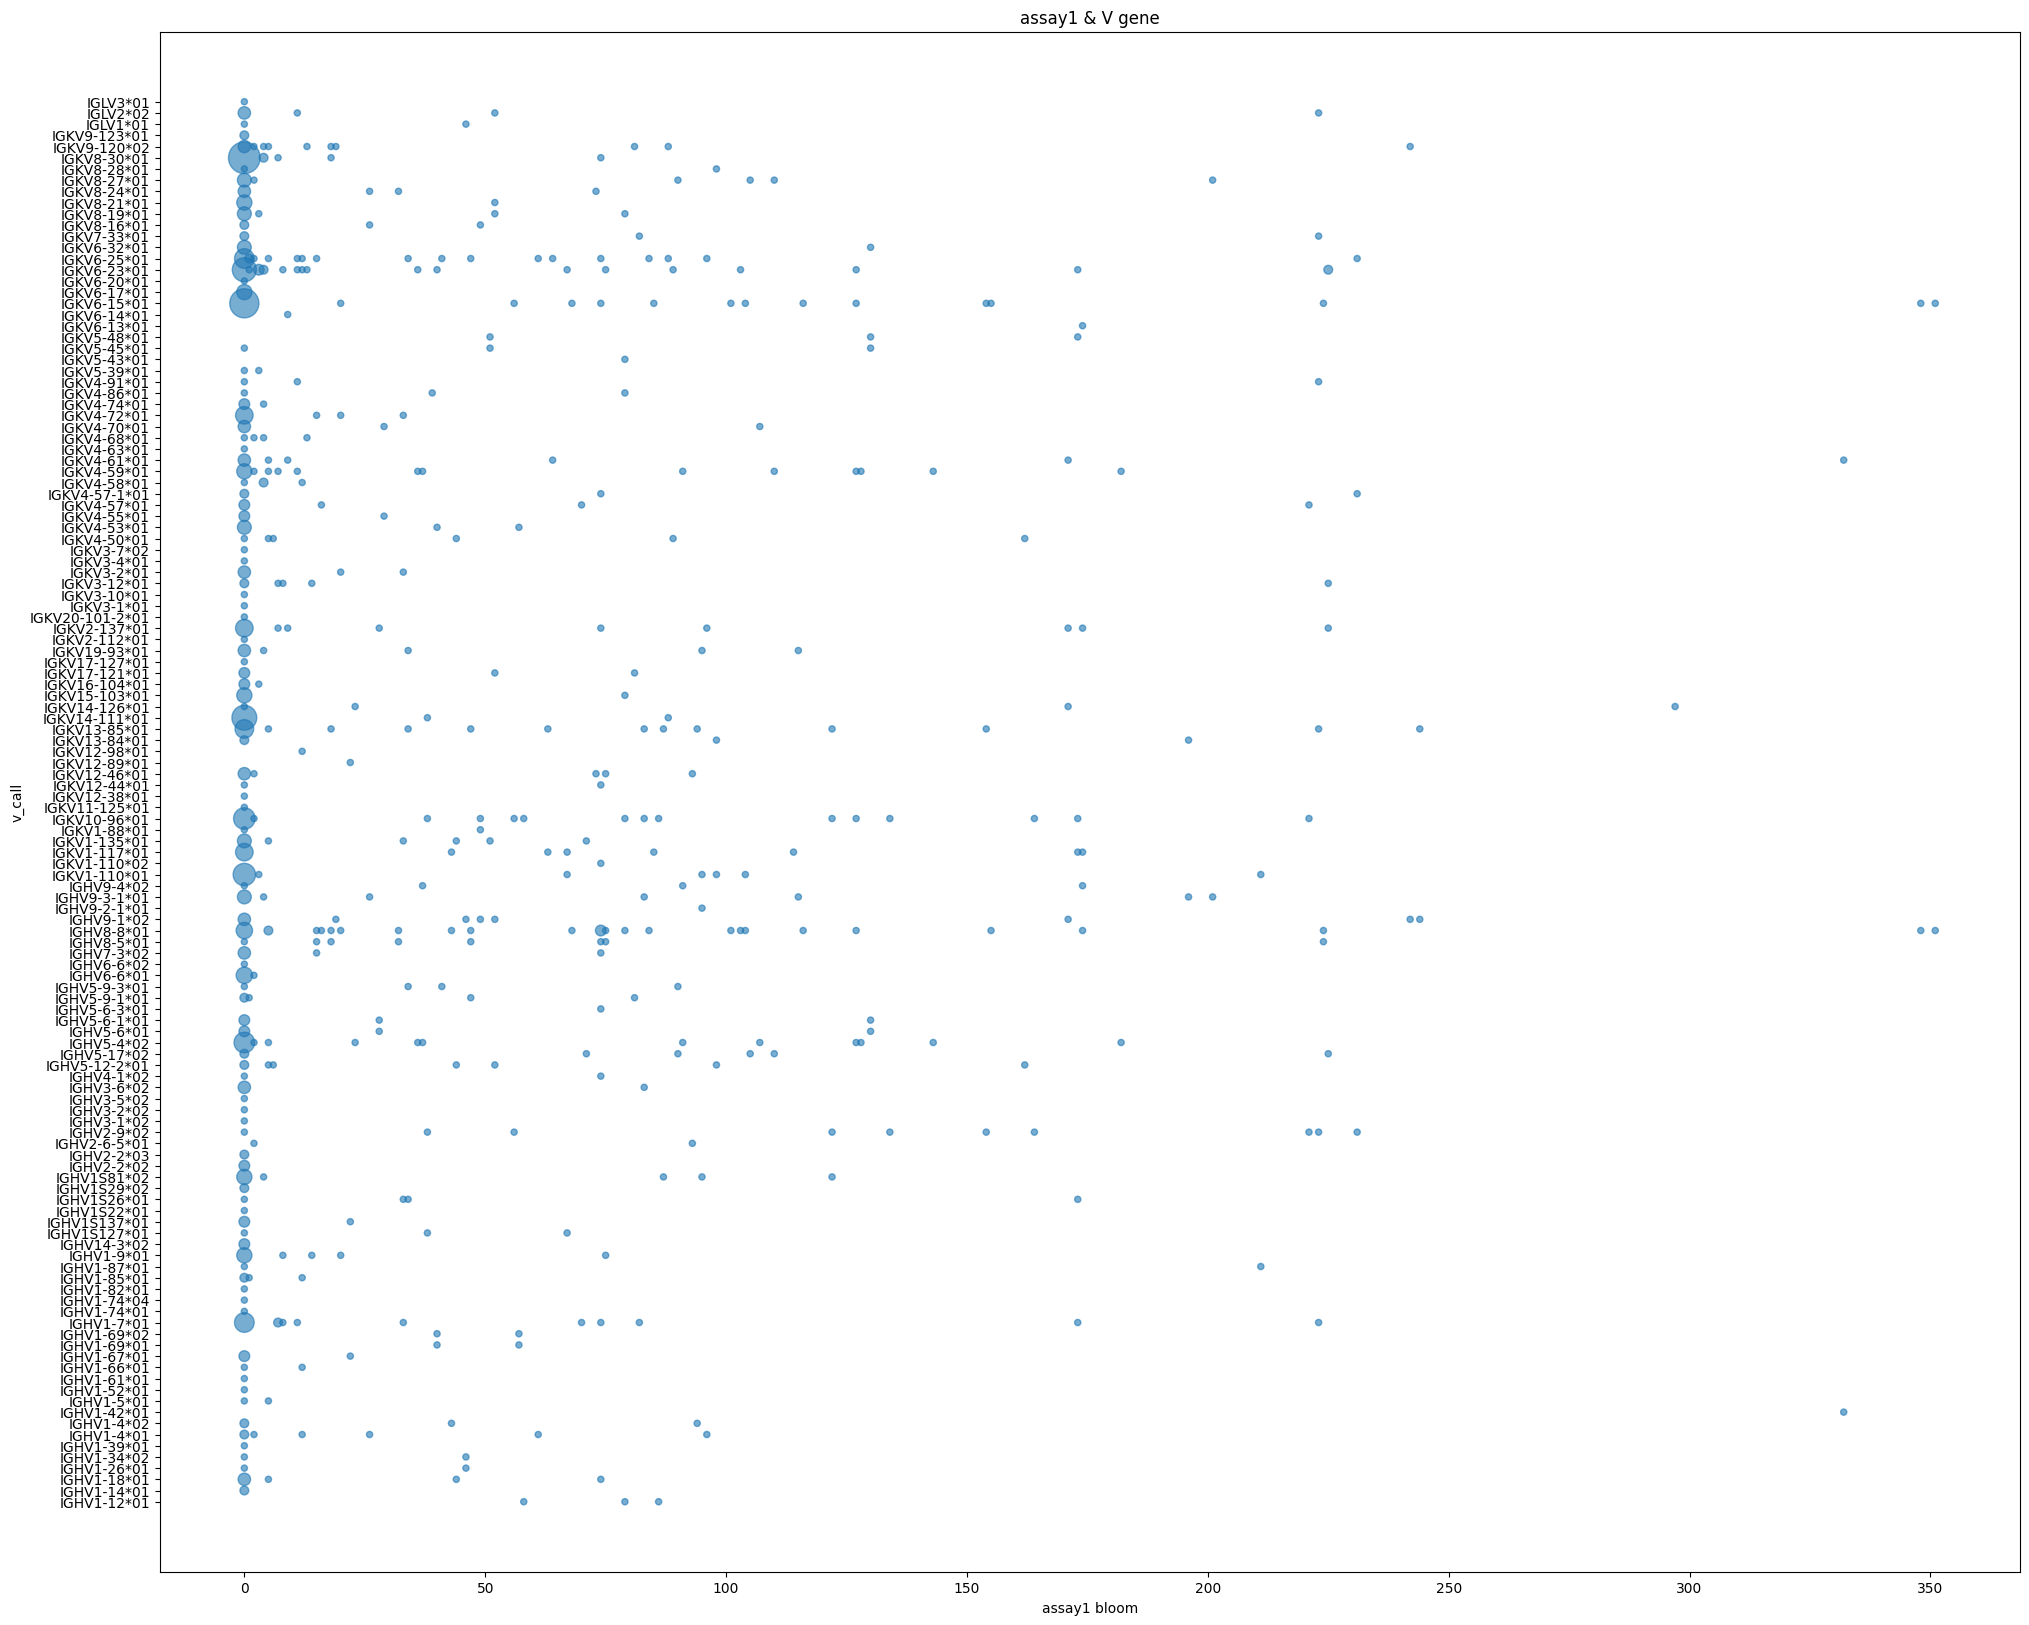

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("/content/Ceacam6_merged_output.csv")

df['v_call_list'] = df['v_call'].str.split(',')
df_exploded = df.explode('v_call_list')
df_exploded['v_call_list'] = df_exploded['v_call_list'].str.strip()

grouped = df_exploded.groupby(['B1', 'v_call_list']).size().reset_index(name='count')

v_calls = sorted(grouped['v_call_list'].unique())
v_call_to_num = {v: i for i, v in enumerate(v_calls)}
grouped['v_call_num'] = grouped['v_call_list'].map(v_call_to_num)

# scatter plot 생성
plt.figure(figsize=(24,20))
plt.scatter(grouped['B1'], grouped['v_call_num'], s=grouped['count']*20, alpha=0.6)

plt.xlabel("assay1 bloom")
plt.ylabel("v_call")
plt.yticks(ticks=range(len(v_calls)), labels=v_calls)
plt.title("assay1 & V gene")

plt.show()


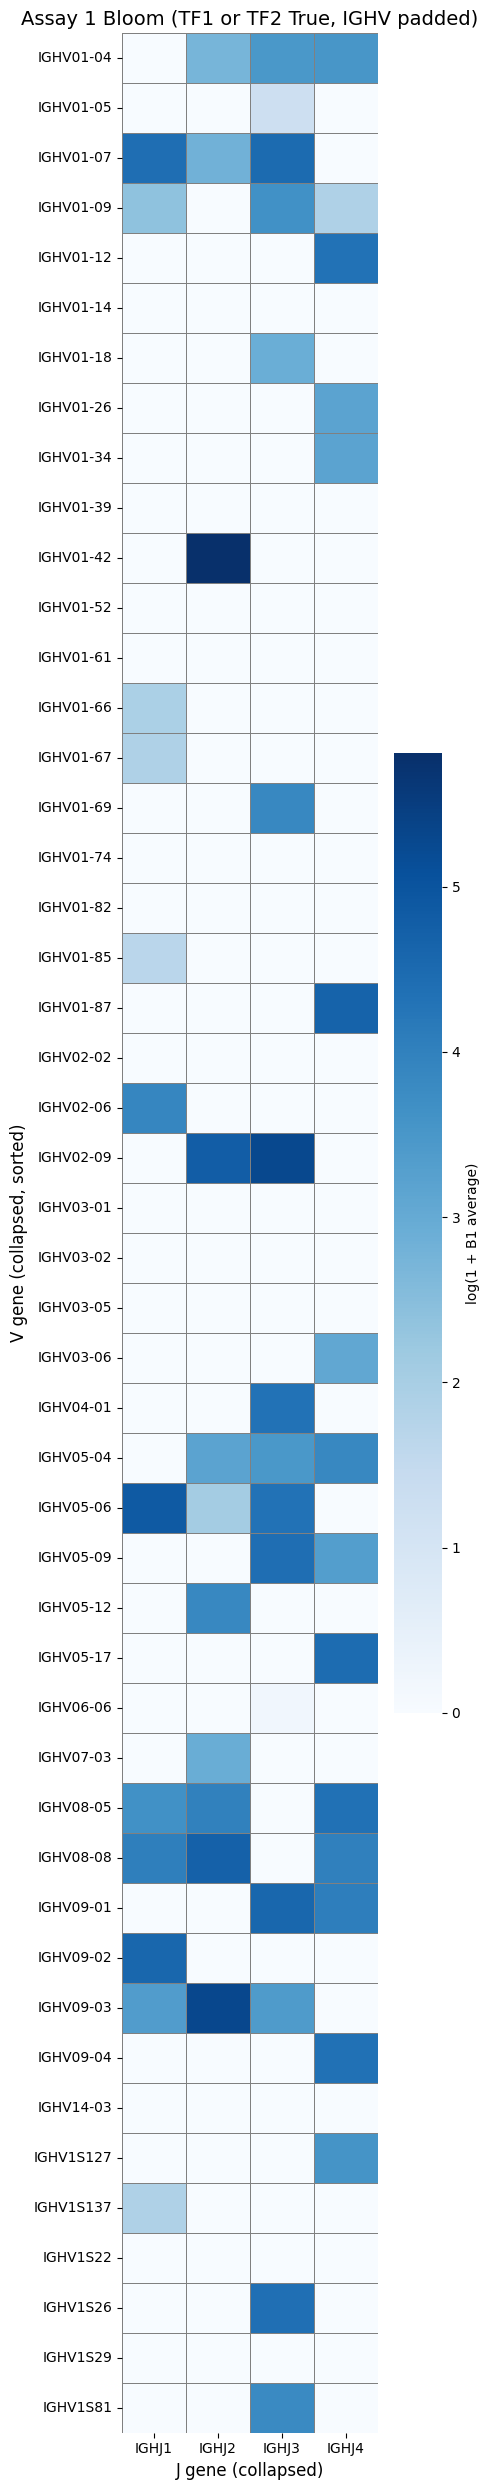

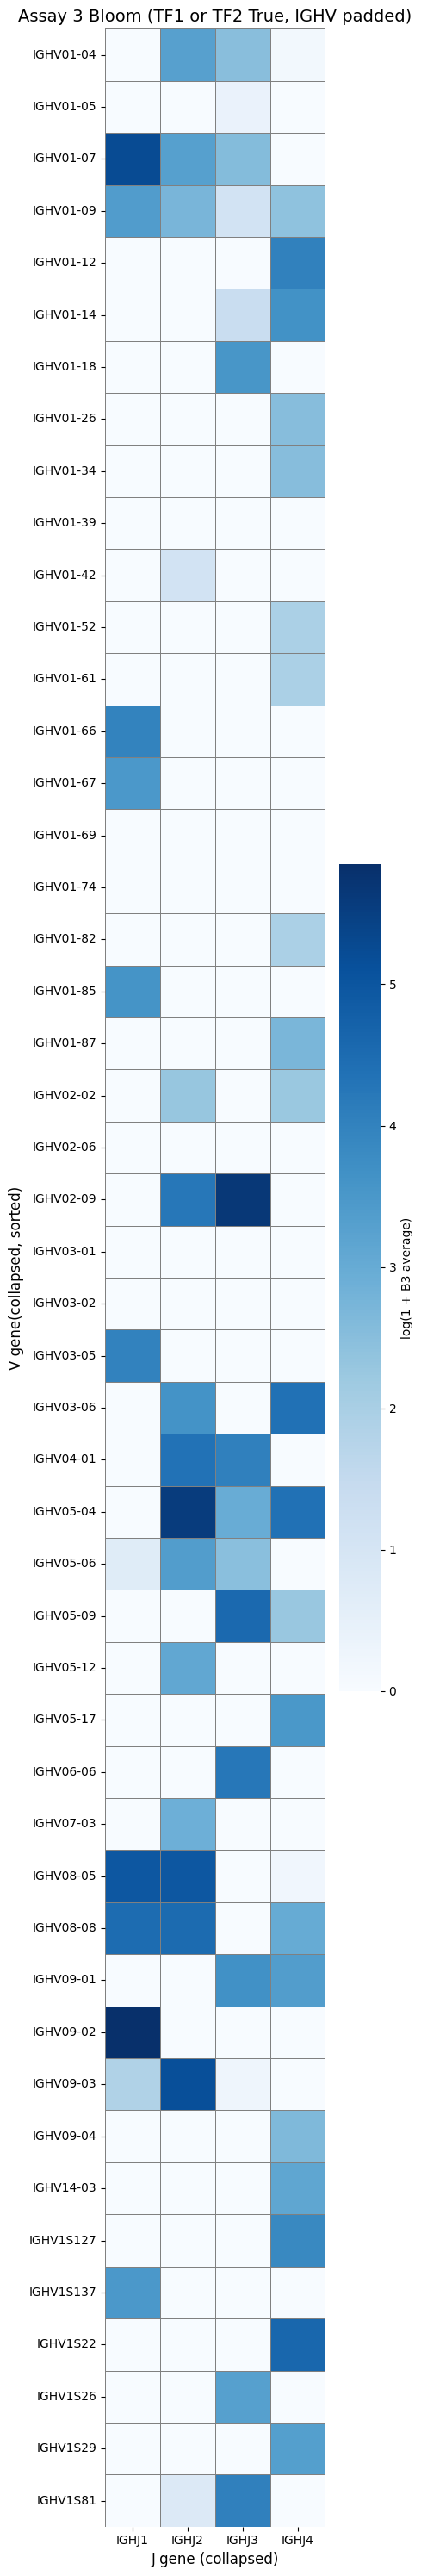

In [ ]:
# 라이브러리 로드
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

# 파일 경로
file_path = "/content/Ceacam6_merged_output.csv"

# 1. 데이터 불러오기 + TF1 또는 TF2가 True인 행 필터
df = pd.read_csv(file_path)

# 2. IGHV 포함 V gene만 필터링
igh_df = df[df['v_call'].astype(str).str.contains('IGHV', na=False)].copy()

# 3. v_call, j_call → 리스트 분해 후 explode
igh_df['v_call_list'] = igh_df['v_call'].astype(str).str.split(',')
igh_df['j_call_list'] = igh_df['j_call'].astype(str).str.split(',')

exploded = igh_df.explode('v_call_list')
exploded = exploded.explode('j_call_list')

exploded['v_call_list'] = exploded['v_call_list'].str.strip()
exploded['j_call_list'] = exploded['j_call_list'].str.strip()

# 4. B1을 숫자로 변환
exploded['B1'] = pd.to_numeric(exploded['B1'], errors='coerce')

# 5. ✅ V gene 이름 정규화 함수 (예: IGHV5-9-3 → IGHV05-09, IGHV1-4 → IGHV01-04)
def normalize_v_gene(name):
    base = name.split('*')[0]  # allele 제거
    match = re.match(r'^(IGHV)(\d+)-(\d+)', base)
    if match:
        fam, prefix, suffix = match.groups()
        return f"{fam}{int(prefix):02d}-{int(suffix):02d}"
    return base  # 포맷이 맞지 않으면 그대로 반환

# 6. V/J gene 이름 정제
exploded['v_call_collapsed'] = exploded['v_call_list'].apply(normalize_v_gene)
exploded['j_call_collapsed'] = exploded['j_call_list'].str.replace(r'\*.*', '', regex=True)

# 7. 피벗 테이블 생성 (V gene × J gene → 평균 B1)
pivot = exploded.pivot_table(
    index='v_call_collapsed',
    columns='j_call_collapsed',
    values='B1',
    aggfunc='mean'
).fillna(0).sort_index()

# 8. log(1 + x) 변환
log_pivot = np.log1p(pivot)

# 9. 히트맵 시각화
plt.figure(figsize=(5, 25))
sns.heatmap(log_pivot, cmap='Blues', linewidths=0.5, linecolor='gray',
            annot=False, cbar_kws={"label": "log(1 + B1 average)"})

plt.title("Assay 1 Bloom (TF1 or TF2 True, IGHV padded)", fontsize=14)
plt.ylabel("V gene (collapsed, sorted)", fontsize=12)
plt.xlabel("J gene (collapsed)", fontsize=12)
plt.tight_layout()
plt.show()

exploded['B3'] = pd.to_numeric(exploded['B3'], errors='coerce')

# 5. ✅ V gene 이름 정규화 함수 (예: IGHV5-9-3 → IGHV05-09, IGHV1-4 → IGHV01-04)
def normalize_v_gene(name):
    base = name.split('*')[0]  # allele 제거
    match = re.match(r'^(IGHV)(\d+)-(\d+)', base)
    if match:
        fam, prefix, suffix = match.groups()
        return f"{fam}{int(prefix):02d}-{int(suffix):02d}"
    return base  # 포맷이 맞지 않으면 그대로 반환

# 6. V/J gene 이름 정제
exploded['v_call_collapsed'] = exploded['v_call_list'].apply(normalize_v_gene)
exploded['j_call_collapsed'] = exploded['j_call_list'].str.replace(r'\*.*', '', regex=True)

# 7. 피벗 테이블 생성 (V gene × J gene → 평균 B1)
pivot = exploded.pivot_table(
    index='v_call_collapsed',
    columns='j_call_collapsed',
    values='B3',
    aggfunc='mean'
).fillna(0).sort_index()

# 8. log(1 + x) 변환
log_pivot = np.log1p(pivot)

# 9. 히트맵 시각화
plt.figure(figsize=(5, 30))
sns.heatmap(log_pivot, cmap='Blues', linewidths=0.5, linecolor='gray',
            annot=False, cbar_kws={"label": "log(1 + B3 average)"})

plt.title("Assay 3 Bloom (TF1 or TF2 True, IGHV padded)", fontsize=14)
plt.ylabel("V gene(collapsed, sorted)", fontsize=12)
plt.xlabel("J gene (collapsed)", fontsize=12)
plt.tight_layout()
plt.show()

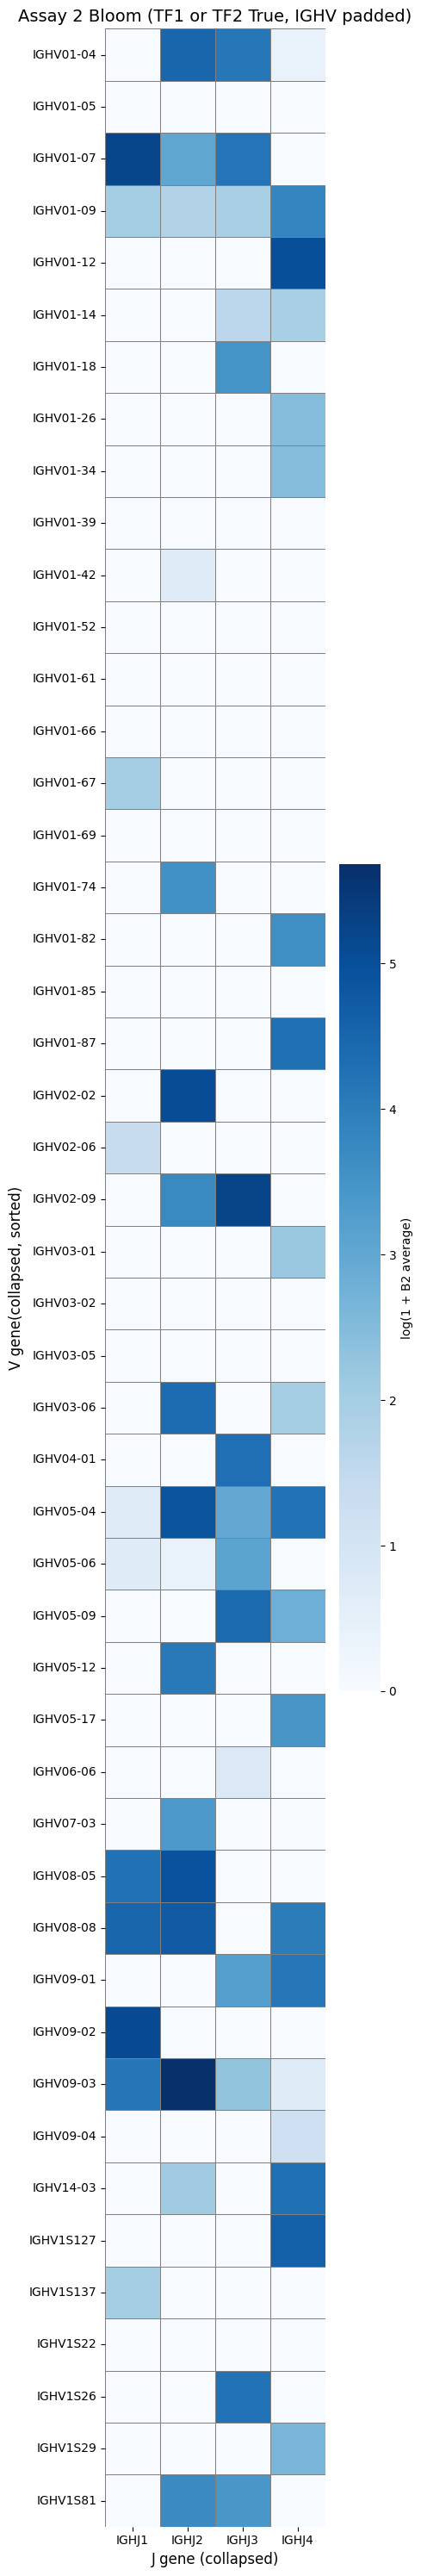

In [ ]:
exploded['B2-2'] = pd.to_numeric(exploded['B2-2'], errors='coerce')

# 5. ✅ V gene 이름 정규화 함수 (예: IGHV5-9-3 → IGHV05-09, IGHV1-4 → IGHV01-04)
def normalize_v_gene(name):
    base = name.split('*')[0]  # allele 제거
    match = re.match(r'^(IGHV)(\d+)-(\d+)', base)
    if match:
        fam, prefix, suffix = match.groups()
        return f"{fam}{int(prefix):02d}-{int(suffix):02d}"
    return base  # 포맷이 맞지 않으면 그대로 반환

# 6. V/J gene 이름 정제
exploded['v_call_collapsed'] = exploded['v_call_list'].apply(normalize_v_gene)
exploded['j_call_collapsed'] = exploded['j_call_list'].str.replace(r'\*.*', '', regex=True)

# 7. 피벗 테이블 생성 (V gene × J gene → 평균 B1)
pivot = exploded.pivot_table(
    index='v_call_collapsed',
    columns='j_call_collapsed',
    values='B2-2',
    aggfunc='mean'
).fillna(0).sort_index()

# 8. log(1 + x) 변환
log_pivot = np.log1p(pivot)

# 9. 히트맵 시각화
plt.figure(figsize=(5, 30))
sns.heatmap(log_pivot, cmap='Blues', linewidths=0.5, linecolor='gray',
            annot=False, cbar_kws={"label": "log(1 + B2 average)"})

plt.title("Assay 2 Bloom (TF1 or TF2 True, IGHV padded)", fontsize=14)
plt.ylabel("V gene(collapsed, sorted)", fontsize=12)
plt.xlabel("J gene (collapsed)", fontsize=12)
plt.tight_layout()
plt.show()

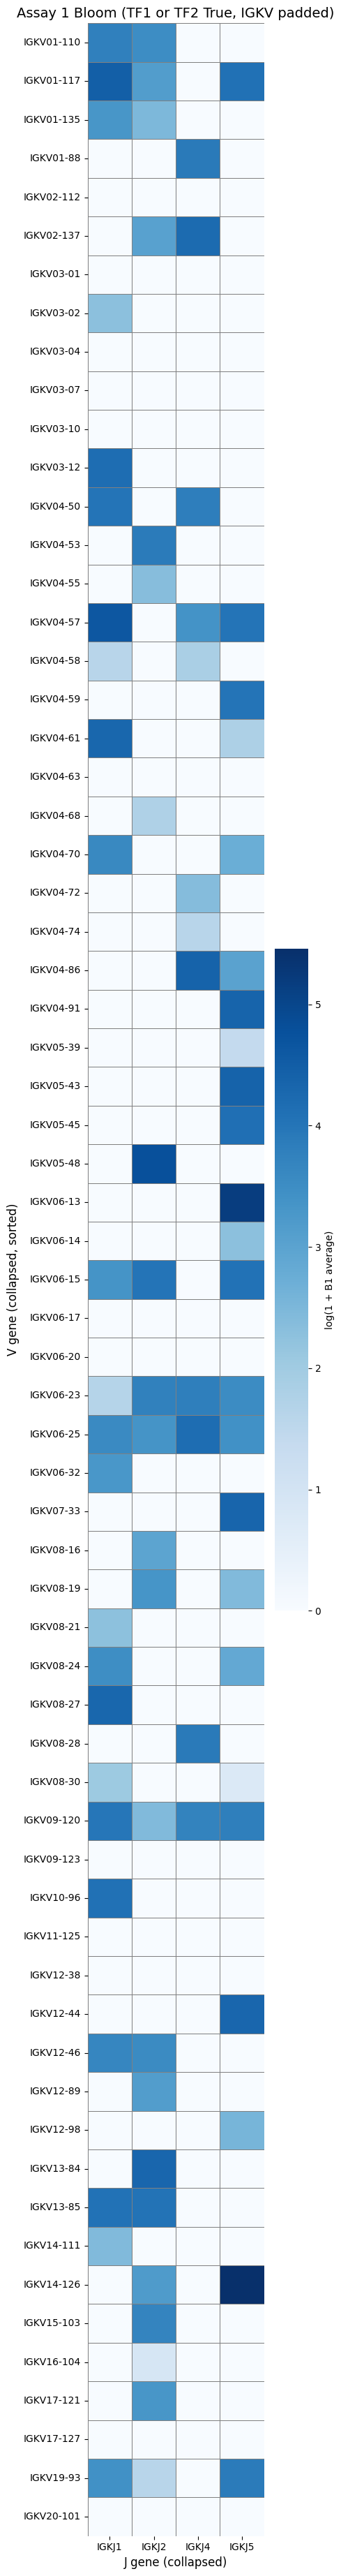

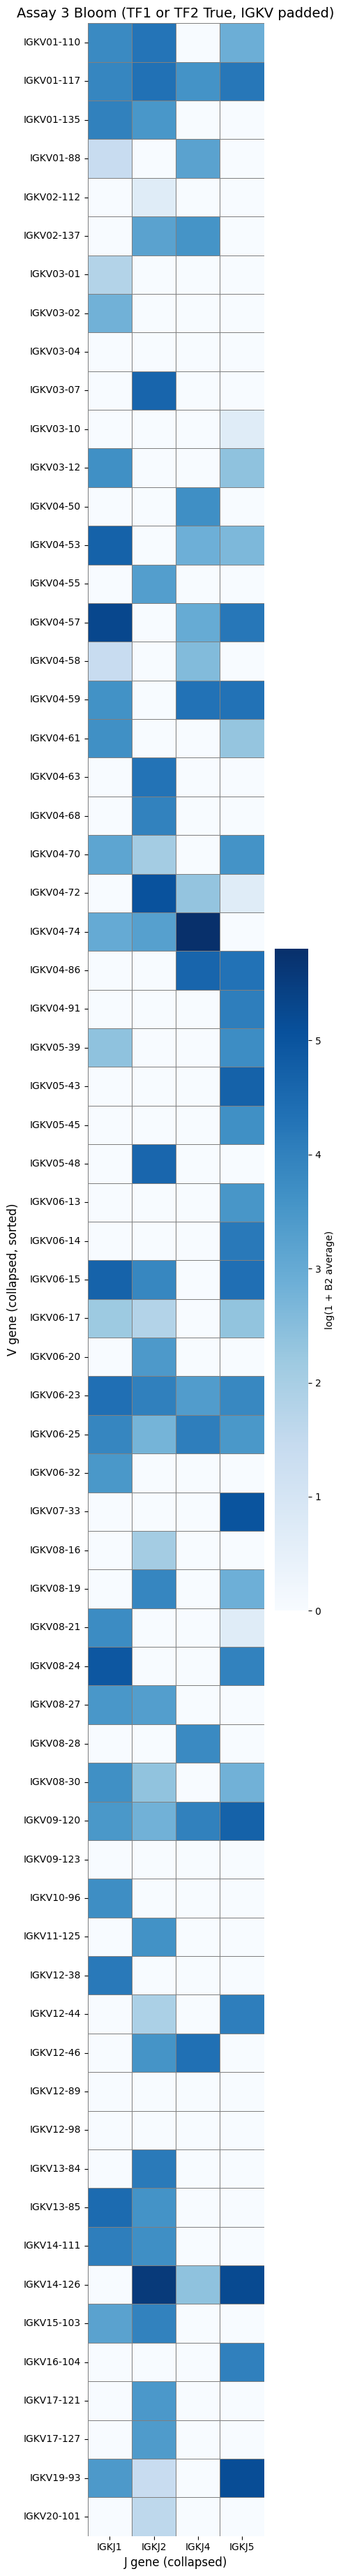

In [ ]:
# 라이브러리 로드
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

# 파일 경로
file_path = "/content/Ceacam6_merged_output.csv"

# 1. 데이터 불러오기 + TF1 또는 TF2가 True인 행 필터
df = pd.read_csv(file_path)

# 2. IGHV 포함 V gene만 필터링
igh_df = df[df['v_call'].astype(str).str.contains('IGKV', na=False)].copy()

# 3. v_call, j_call → 리스트 분해 후 explode
igh_df['v_call_list'] = igh_df['v_call'].astype(str).str.split(',')
igh_df['j_call_list'] = igh_df['j_call'].astype(str).str.split(',')

exploded = igh_df.explode('v_call_list')
exploded = exploded.explode('j_call_list')

exploded['v_call_list'] = exploded['v_call_list'].str.strip()
exploded['j_call_list'] = exploded['j_call_list'].str.strip()

# 4. B1을 숫자로 변환
exploded['B1'] = pd.to_numeric(exploded['B1'], errors='coerce')

# 5. ✅ V gene 이름 정규화 함수 (예: IGHV5-9-3 → IGHV05-09, IGHV1-4 → IGHV01-04)
def normalize_v_gene(name):
    base = name.split('*')[0]  # allele 제거
    match = re.match(r'^(IGKV)(\d+)-(\d+)', base)
    if match:
        fam, prefix, suffix = match.groups()
        return f"{fam}{int(prefix):02d}-{int(suffix):02d}"
    return base  # 포맷이 맞지 않으면 그대로 반환

# 6. V/J gene 이름 정제
exploded['v_call_collapsed'] = exploded['v_call_list'].apply(normalize_v_gene)
exploded['j_call_collapsed'] = exploded['j_call_list'].str.replace(r'\*.*', '', regex=True)

# 7. 피벗 테이블 생성 (V gene × J gene → 평균 B1)
pivot = exploded.pivot_table(
    index='v_call_collapsed',
    columns='j_call_collapsed',
    values='B1',
    aggfunc='mean'
).fillna(0).sort_index()

# 8. log(1 + x) 변환
log_pivot = np.log1p(pivot)

# 9. 히트맵 시각화
plt.figure(figsize=(5, 37))
sns.heatmap(log_pivot, cmap='Blues', linewidths=0.5, linecolor='gray',
            annot=False, cbar_kws={"label": "log(1 + B1 average)"})

plt.title("Assay 1 Bloom (TF1 or TF2 True, IGKV padded)", fontsize=14)
plt.ylabel("V gene (collapsed, sorted)", fontsize=12)
plt.xlabel("J gene (collapsed)", fontsize=12)
plt.tight_layout()
plt.show()

exploded['B3'] = pd.to_numeric(exploded['B3'], errors='coerce')

# 5. ✅ V gene 이름 정규화 함수 (예: IGHV5-9-3 → IGHV05-09, IGHV1-4 → IGHV01-04)
def normalize_v_gene(name):
    base = name.split('*')[0]  # allele 제거
    match = re.match(r'^(IGKV)(\d+)-(\d+)', base)
    if match:
        fam, prefix, suffix = match.groups()
        return f"{fam}{int(prefix):02d}-{int(suffix):02d}"
    return base  # 포맷이 맞지 않으면 그대로 반환

# 6. V/J gene 이름 정제
exploded['v_call_collapsed'] = exploded['v_call_list'].apply(normalize_v_gene)
exploded['j_call_collapsed'] = exploded['j_call_list'].str.replace(r'\*.*', '', regex=True)

# 7. 피벗 테이블 생성 (V gene × J gene → 평균 B1)
pivot = exploded.pivot_table(
    index='v_call_collapsed',
    columns='j_call_collapsed',
    values='B3',
    aggfunc='mean'
).fillna(0).sort_index()

# 8. log(1 + x) 변환
log_pivot = np.log1p(pivot)

# 9. 히트맵 시각화
plt.figure(figsize=(5,37))
sns.heatmap(log_pivot, cmap='Blues', linewidths=0.5, linecolor='gray',
            annot=False, cbar_kws={"label": "log(1 + B2 average)"})

plt.title("Assay 3 Bloom (TF1 or TF2 True, IGKV padded)", fontsize=14)
plt.ylabel("V gene (collapsed, sorted)", fontsize=12)
plt.xlabel("J gene (collapsed)", fontsize=12)
plt.tight_layout()
plt.show()

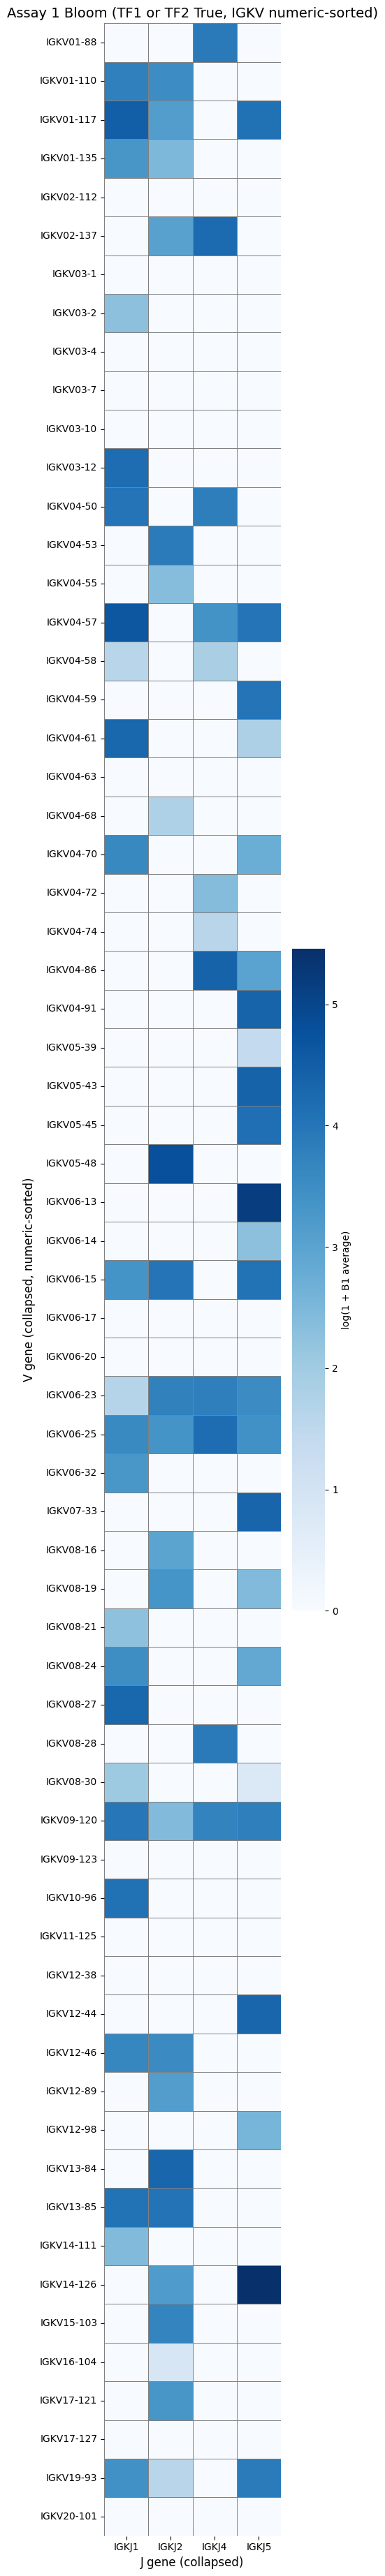

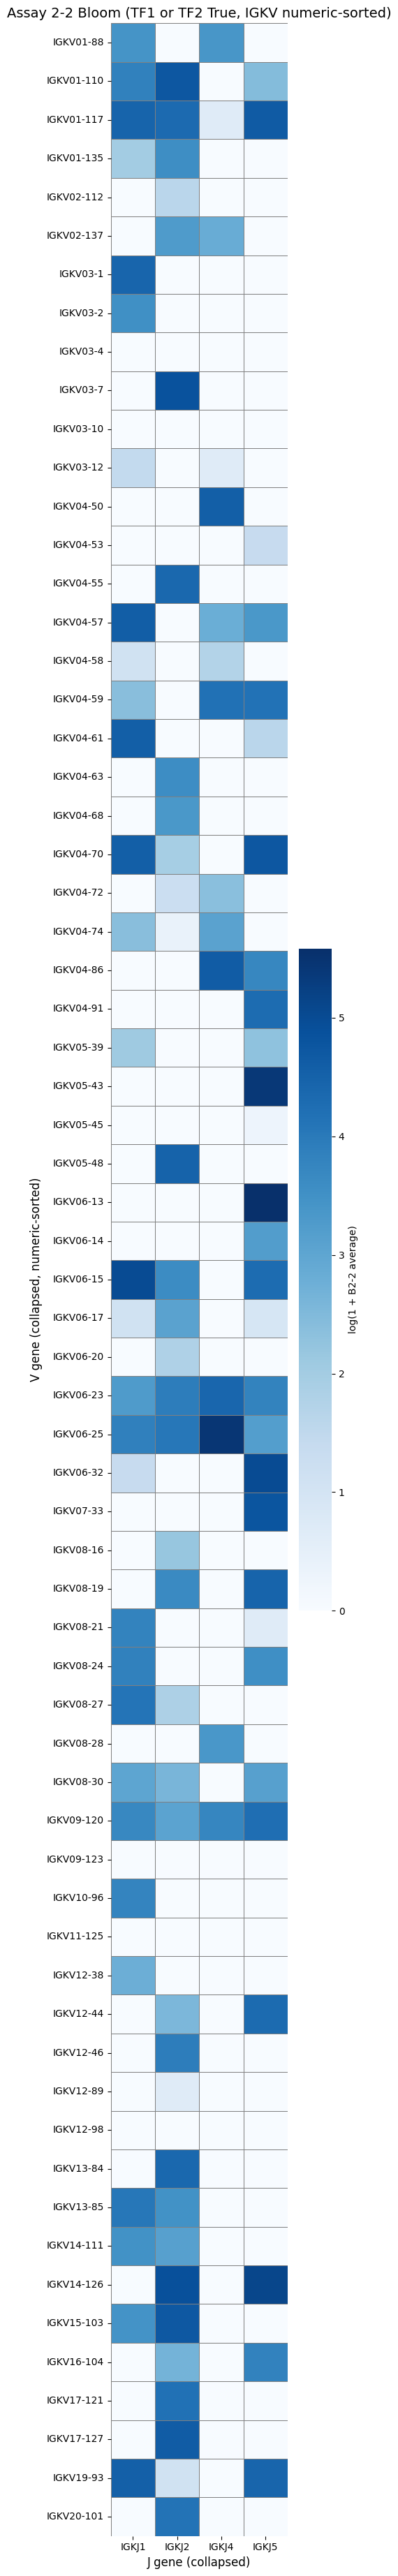

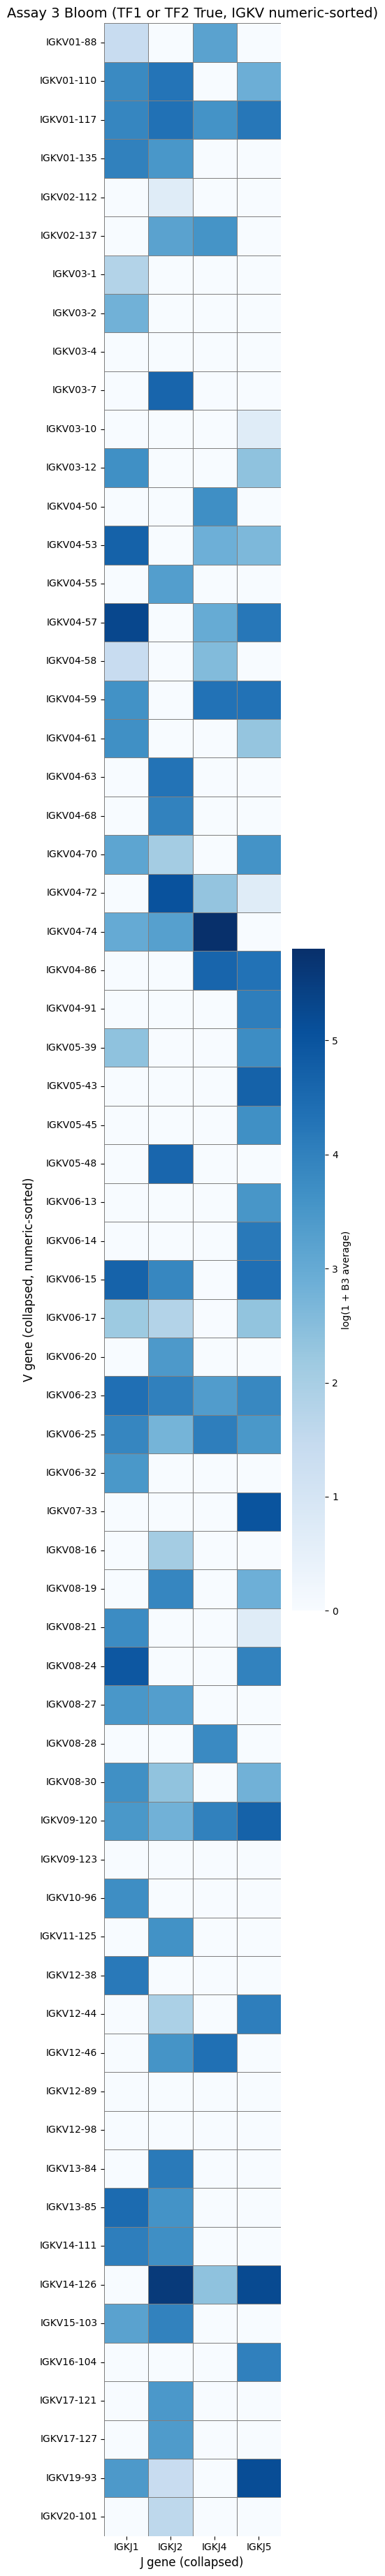

In [ ]:
# 라이브러리 로드
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

# ===== 공통 설정: 모든 히트맵에 동일 적용 =====
FIGSIZE = (5, 37)  # 동일한 그림 크기 유지

# 파일 경로
file_path = "/content/Ceacam6_merged_output.csv"

# 1) 데이터 불러오기 + (있다면) TF1 또는 TF2가 True인 행 필터
df = pd.read_csv(file_path)

if {'TF1', 'TF2'}.issubset(df.columns):
    mask = df[['TF1', 'TF2']].fillna(False).astype(bool).any(axis=1)
    df = df[mask].copy()

# 2) IGKV만 필터링
kv_df = df[df['v_call'].astype(str).str.contains('IGKV', na=False)].copy()

# 3) v_call, j_call → 리스트 분해 후 explode
kv_df['v_call_list'] = kv_df['v_call'].astype(str).str.split(',')
kv_df['j_call_list'] = kv_df['j_call'].astype(str).str.split(',')

exploded = kv_df.explode('v_call_list').explode('j_call_list')
exploded['v_call_list'] = exploded['v_call_list'].str.strip()
exploded['j_call_list'] = exploded['j_call_list'].str.strip()

# 4) 수치형 변환 (B1, B2-2, B3 모두 처리)
for col in ['B1', 'B2-2', 'B3']:
    if col in exploded.columns:
        exploded[col] = pd.to_numeric(exploded[col], errors='coerce')

# 5) V/J gene 이름 정제 (allele 제거 + IGKVxx-yy 표기 유지)
def normalize_v_gene(name: str) -> str:
    base = str(name).split('*')[0]  # allele 제거
    m = re.match(r'^(IGKV)(\d+)-(\d+)', base)
    if m:
        fam, prefix, suffix = m.groups()
        # 표시는 2자리-원본 숫자, 정렬은 숫자 기준으로 처리
        return f"{fam}{int(prefix):02d}-{int(suffix)}"
    return base  # 포맷이 안 맞으면 원본 유지

exploded['v_call_collapsed'] = exploded['v_call_list'].apply(normalize_v_gene)
exploded['j_call_collapsed'] = exploded['j_call_list'].str.replace(r'\*.*', '', regex=True)

# 6) (핵심) V 인덱스를 숫자 기준으로 정렬
def numeric_sort_v_index(pivot: pd.DataFrame) -> pd.DataFrame:
    parts = pivot.index.to_series().str.extract(r'^IGKV(\d+)-(\+?\d+)', expand=True)
    parts.columns = ['fam', 'gene']
    parts['fam'] = pd.to_numeric(parts['fam'], errors='coerce')
    parts['gene'] = pd.to_numeric(parts['gene'], errors='coerce')
    parts['_fam_key'] = parts['fam'].fillna(1_000_000)
    parts['_gene_key'] = parts['gene'].fillna(1_000_000)
    order = parts.sort_values(['_fam_key', '_gene_key']).index
    return pivot.loc[order]

# 7) 피벗 → 정렬 → log1p → 히트맵 렌더링 (그림 크기 고정)
def render_heatmap(value_col: str, title: str):
    if value_col not in exploded.columns:
        print(f"'{value_col}' 컬럼이 없습니다. 건너뜁니다.")
        return

    pivot = exploded.pivot_table(
        index='v_call_collapsed',
        columns='j_call_collapsed',
        values=value_col,
        aggfunc='mean'
    ).fillna(0)

    # V 인덱스를 숫자 기준으로 정렬
    pivot = numeric_sort_v_index(pivot)

    # log(1 + x) 변환
    log_pivot = np.log1p(pivot)

    # ===== 모든 플롯 동일 FIGSIZE 사용 =====
    plt.figure(figsize=FIGSIZE)
    sns.heatmap(
        log_pivot,
        cmap='Blues',
        linewidths=0.5,
        linecolor='gray',
        annot=False,
        cbar_kws={"label": f"log(1 + {value_col} average)"}
    )
    plt.title(title, fontsize=14)
    plt.ylabel("V gene (collapsed, numeric-sorted)", fontsize=12)
    plt.xlabel("J gene (collapsed)", fontsize=12)
    plt.tight_layout()
    plt.show()

# 8) 히트맵 그리기: B1, B2-2, B3 (모두 동일 사이즈)
render_heatmap(
    value_col='B1',
    title="Assay 1 Bloom (TF1 or TF2 True, IGKV numeric-sorted)"
)

render_heatmap(
    value_col='B2-2',
    title="Assay 2-2 Bloom (TF1 or TF2 True, IGKV numeric-sorted)"
)

render_heatmap(
    value_col='B3',
    title="Assay 3 Bloom (TF1 or TF2 True, IGKV numeric-sorted)"
)
